In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("GrandeInsta.csv")

In [2]:
df.head()

,PostDate,ContentType,Likes,Comments,Views,ContentTheme,Caption
0,18-06-2025,Reel,0,0,57.0,"Scoliosis, Testimonial",𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 𝐀𝐰𝐚𝐫𝐞𝐧𝐞𝐬𝐬 𝐌𝐨𝐧𝐭𝐡 !\nPre & Post analys...
1,17-06-2025,Image,3,0,NaN,Scoliosis,𝐌𝐲𝐭𝐡𝐬 & 𝐅𝐚𝐜𝐭𝐬 𝐚𝐛𝐨𝐮𝐭 𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 !\n𝐒𝐞𝐫𝐢𝐞𝐬 - 𝟐
2,16-06-2025,Reel,1,0,284.0,"Scoliosis, Testimonial",𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 𝐀𝐰𝐚𝐫𝐞𝐧𝐞𝐬𝐬 𝐌𝐨𝐧𝐭𝐡 !\nओम राज सिंह - स्क...
3,16-06-2025,Image,16,0,NaN,Training,𝐒𝐭𝐫𝐞𝐧𝐠𝐭𝐡𝐞𝐧𝐢𝐧𝐠 𝐎𝐮𝐫 𝐒𝐤𝐢𝐥𝐥𝐬!\nAs part of our cont...
4,15-06-2025,Image,2,0,NaN,Scoliosis,𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 𝐀𝐰𝐚𝐫𝐞𝐧𝐞𝐬𝐬 𝐌𝐨𝐧𝐭𝐡 !\nScoliosis can't s...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PostDate      36 non-null     object 
 1   ContentType   36 non-null     object 
 2   Likes         36 non-null     int64  
 3   Comments      36 non-null     int64  
 4   Views         20 non-null     float64
 5   ContentTheme  36 non-null     object 
 6   Caption       34 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.1+ KB


In [4]:
df.describe()


,Likes,Comments,Views
count,36.000000,36.000000,20.000000
mean,10.250000,0.083333,470.200000
std,10.103394,0.280306,209.318091
min,0.000000,0.000000,57.000000
25%,3.000000,0.000000,344.000000
50%,7.500000,0.000000,473.000000
75%,14.500000,0.000000,558.000000
max,47.000000,1.000000,867.000000


In [5]:
df['PostDate'] = pd.to_datetime(df['PostDate'], dayfirst=True)


In [6]:
df.isnull().sum()


PostDate         0
ContentType      0
Likes            0
Comments         0
Views           16
ContentTheme     0
Caption          2
dtype: int64

In [7]:
df['Engagement'] = df['Likes'] + df['Comments']


In [8]:
df.head()

,PostDate,ContentType,Likes,Comments,Views,ContentTheme,Caption,Engagement
0,2025-06-18,Reel,0,0,57.0,"Scoliosis, Testimonial",𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 𝐀𝐰𝐚𝐫𝐞𝐧𝐞𝐬𝐬 𝐌𝐨𝐧𝐭𝐡 !\nPre & Post analys...,0
1,2025-06-17,Image,3,0,NaN,Scoliosis,𝐌𝐲𝐭𝐡𝐬 & 𝐅𝐚𝐜𝐭𝐬 𝐚𝐛𝐨𝐮𝐭 𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 !\n𝐒𝐞𝐫𝐢𝐞𝐬 - 𝟐,3
2,2025-06-16,Reel,1,0,284.0,"Scoliosis, Testimonial",𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 𝐀𝐰𝐚𝐫𝐞𝐧𝐞𝐬𝐬 𝐌𝐨𝐧𝐭𝐡 !\nओम राज सिंह - स्क...,1
3,2025-06-16,Image,16,0,NaN,Training,𝐒𝐭𝐫𝐞𝐧𝐠𝐭𝐡𝐞𝐧𝐢𝐧𝐠 𝐎𝐮𝐫 𝐒𝐤𝐢𝐥𝐥𝐬!\nAs part of our cont...,16
4,2025-06-15,Image,2,0,NaN,Scoliosis,𝐒𝐜𝐨𝐥𝐢𝐨𝐬𝐢𝐬 𝐀𝐰𝐚𝐫𝐞𝐧𝐞𝐬𝐬 𝐌𝐨𝐧𝐭𝐡 !\nScoliosis can't s...,2


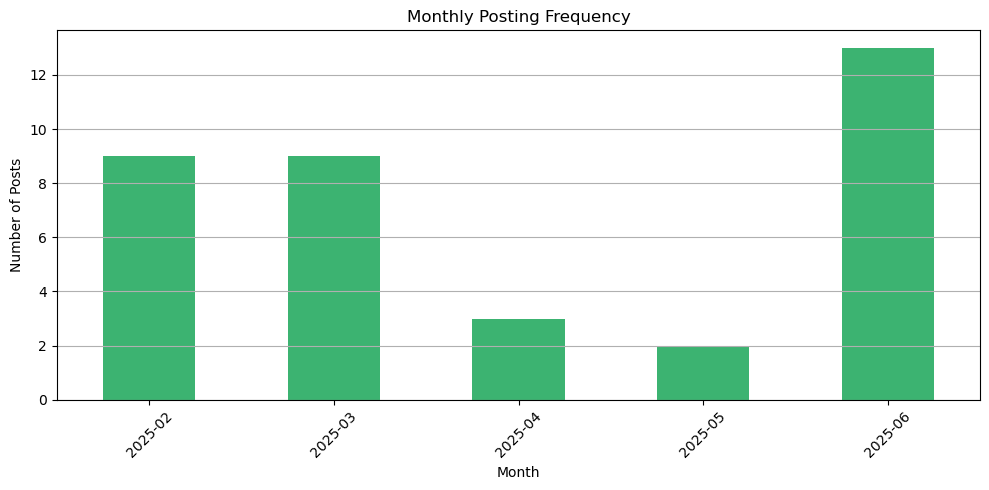

In [9]:
df['YearMonth'] = df['PostDate'].dt.to_period('M')

# Count number of posts per month
monthly_post_counts = df['YearMonth'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
monthly_post_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Monthly Posting Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Avg Performance by Content Type'}, xlabel='ContentType'>

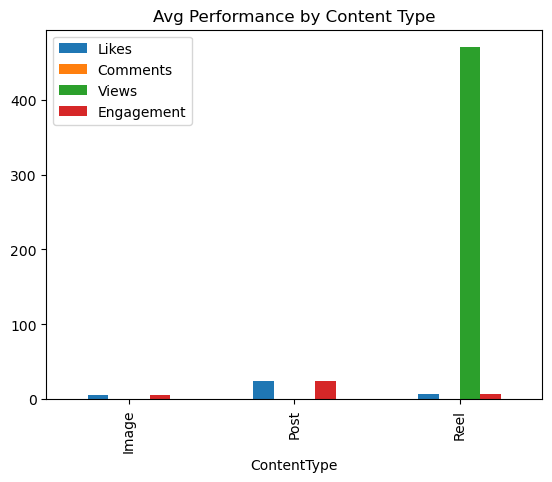

In [10]:
df.groupby('ContentType')[['Likes', 'Comments', 'Views', 'Engagement']].mean().plot(kind='bar', title="Avg Performance by Content Type")

<Axes: title={'center': 'Avg Engagement by Theme'}, ylabel='ContentTheme'>

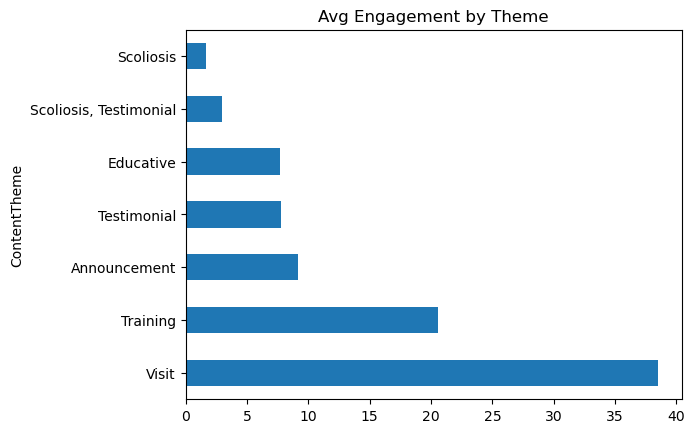

In [11]:
df.groupby('ContentTheme')['Engagement'].mean().sort_values(ascending=False).plot(kind='barh', title="Avg Engagement by Theme")


<Axes: xlabel='Views', ylabel='Likes'>

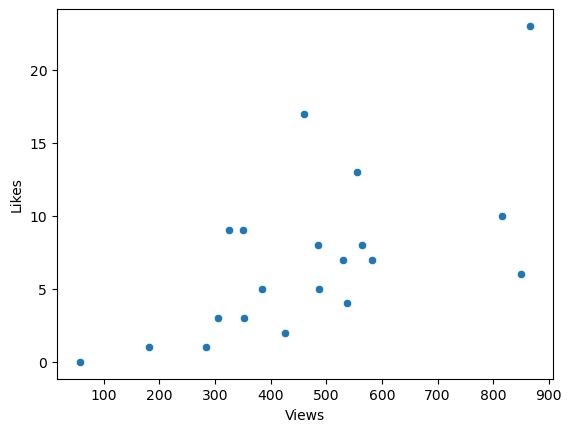

In [12]:
import seaborn as sns
sns.scatterplot(data=df[df['ContentType'] == 'Reel'], x='Views', y='Likes')


In [13]:
def caption_language(text: str) -> str:
    if isinstance(text, str) and any("\u0900" <= ch <= "\u097F" for ch in text):
        return "Nepali"
    return "English"

df["Language"] = df["Caption"].apply(caption_language)

In [14]:
total_days = (df["PostDate"].max() - df["PostDate"].min()).days + 1
posting_cadence = len(df) / (total_days / 7)  # posts per week

In [15]:
avg_engagement = df["Engagement"].mean()

# --- 3.3 Reel like-rate ---
reels = df[(df["ContentType"] == "Reel") & (df["Views"] > 0)]
reel_like_rate = (reels["Likes"] / reels["Views"]).mean() * 100  # %

# --- 3.4 Comments per post ---
comments_per_post = df["Comments"].mean()

# --- 3.5 English vs Nepali engagement gap ---
lang_eng = df.groupby("Language")["Engagement"].mean()
eng_gap = abs(lang_eng.get("English", 0) - lang_eng.get("Nepali", 0))

# --- 3.6 High-performer theme share ---
high_theme_mask = df["ContentTheme"].str.contains("Visit|Training", case=False, na=False)
high_theme_share = high_theme_mask.mean() * 100  # %

# --- 3.7 Stories usage ---
# Nothing in CSV – assume zero; replace if you track Stories separately
stories_usage = 0

# -------------------------------
# 4. Assemble KPI table
# -------------------------------
kpi_baseline = pd.DataFrame({
    "KPI": [
        "Posting cadence (posts / week)",
        "Avg engagement per post",
        "Reel like-rate (%)",
        "Comments per post",
        "English-Nepali engagement gap",
        "High-performer theme share (%)",
        "Interactive Stories per week"
    ],
    "Current": [
        round(posting_cadence, 2),
        round(avg_engagement, 2),
        round(reel_like_rate, 2),
        round(comments_per_post, 2),
        round(eng_gap, 2),
        round(high_theme_share, 2),
        stories_usage
    ],
    "30-Day Target": [
        3,      # posts / week
        15,     # avg engagement
        3,      # %
        0.5,    # comments
        3,      # gap
        35,     # %
        3       # stories
    ]
})

# -------------------------------
# 5. Output results
# -------------------------------
print("=== KPI Baseline vs 30-Day Target ===\n")
print(kpi_baseline.to_string(index=False))

=== KPI Baseline vs 30-Day Target ===

                           KPI  Current  30-Day Target
Posting cadence (posts / week)     1.88            3.0
       Avg engagement per post    10.33           15.0
            Reel like-rate (%)     1.39            3.0
             Comments per post     0.08            0.5
 English-Nepali engagement gap     5.94            3.0
High-performer theme share (%)    19.44           35.0
  Interactive Stories per week     0.00            3.0
